In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

# Q1: Variance
The goal of this question is to study the variance of different algorithms for adversarial multi- armed bandits problem experimentally. Consider the EXP3 and EXP3-IX algorithms that were discussed in class for this problem. Let the number of arms be 10. At each iteration, generate a 10 dimensional loss vector where each component is chosen iid from a Beta distribution with both parameters equal to 5 for all arms except the 10th arm. For the 10th arm, let the parameters be α = 5, β = 10. Implement both the algorithms and run it for 1000 times for 10, 000 iterations each and plot the (pseudo) regrets along with error bars. Comment on the variance of these two algorithms. (Bonus: what happens to the variance when you play around with the shape parameters?)


# EXP3

In [4]:
def generate_loss(alpha,beta_1,beta_2,T,d):
    loss_vector = []
    for i in range(0,T):
        loss_vector.append(np.random.beta(alpha, beta_1, d-1).tolist() + [np.random.beta(alpha, beta_2)])
    return loss_vector

In [54]:
class EXP3():
    def __init__(self,d,w,loss,eta,gamma):
        self.d = d
        self.w = w
        self.probabilities=[]
        self.cum_loss=0
        self.min_cum_loss = 0
        self.total_regret = 0
        self.loss_hat = []
        self.regrets = []
        self.loss_T = loss
        self.cum_loss_vector = np.zeros(d)
        self.cum_regrets = np.zeros(T)
        self.arm_choosen_count = np.zeros(d)
        self.gamma = gamma
        self.eta = eta


    def update_mean(self,chosen_arm,loss):
        self.arm_choosen_count[chosen_arm]+=1
        self.cum_loss_vector[chosen_arm] = ((self.cum_loss_vector[chosen_arm]*(self.arm_choosen_count[chosen_arm]-1))+loss)/self.arm_choosen_count[chosen_arm]
        
        
    def run(self,T):
        for t in range(0,T):
            self.loss = self.loss_T[t] 
            l_hat = np.zeros(d)
    
            probability = self.w/np.sum(self.w)
            self.probabilities.append(probability)
            
            if np.isnan(probability).any():
                probability = np.nan_to_num(probability, nan=1e-10)
                
            action = np.random.choice(d,p=self.probabilities[t])#choose an arm based on probability distribution
            curr_loss = self.loss[action]
            self.cum_loss+= curr_loss

            min_loss_arm = np.argmin(self.loss)
            min_loss = self.loss[min_loss_arm]
            self.min_cum_loss+=min_loss

            
            # Regret calculation
            regret = self.cum_loss - self.min_cum_loss
            self.total_regret+= regret
            self.cum_regrets[t] = regret
            
            l_hat[action] = curr_loss/self.probabilities[t][action]
            self.w[action] = self.w[action]*np.exp(-self.eta*l_hat[action])
            # self.w[action] = self.w[action]*np.exp((-self.gamma*l_hat[action])/d)
            # print(self.w)
                        
        return self.cum_regrets

        
        

0.06925164651903044


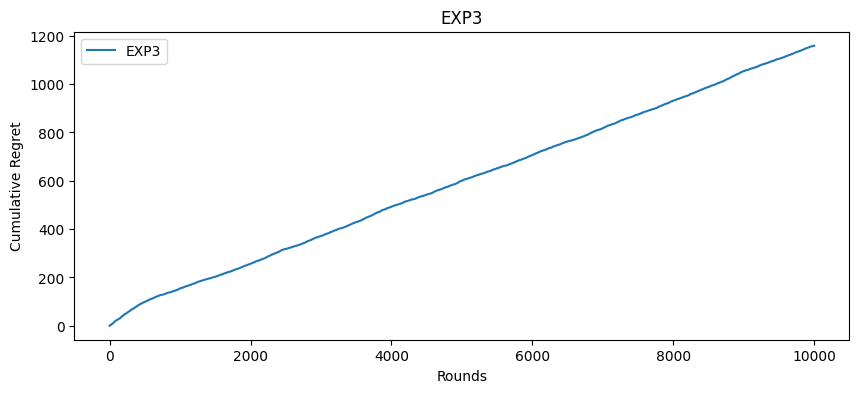

In [55]:
d = 10 #no of arms
w = np.ones(d) #intialize weights of 10 arms
T = 10000 #no of time steps
alpha = 5
beta_1 = 5
beta_2 = 10
loss = generate_loss(alpha,beta_1,beta_2,T,d)
eta = math.sqrt((2*math.log(d+1))/T*d)
# eta = 0.07
print(eta)
gamma = eta/2
exp3 = EXP3(d,w,loss,eta,gamma) 
regret = exp3.run(T)

plt.figure(figsize=(10, 4))
plt.plot(regret, label='EXP3')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.title('EXP3')
plt.legend()
plt.show()

### Approach-EXP3:
- Considered number of arms **(d = 10)**.
- Generated a d dimensional loss vector where each component is chosen iid from a Beta distribution.
- for 1 to 9 arms **α = 5, β = 5**
- for 10th arm **α = 5, β = 10**
- considering initial weights w = 1 for all the arms.
- **eta = math.sqrt((2*math.log(d+1))/T*d).**
- **gamma = eta/2.**
- 
- In **EXP3**(Explore, Exploit, Exponentiate) algorithm:
- for each round t in T:
- probabilty **(p)** = w/sum(w)
- choose an arm based on random weighted choice and get the loss Li
- update Li_hat = [0,0,...,Li/p_i,..0,0]
- **[Hedge Update]:** update the weights w = w * e^-eta*Li_hat


# EXP3-IX

In [58]:
class EXP3IX():
    def __init__(self,d,w,loss,eta,gamma):
        self.d = d
        self.w = w
        self.probabilities=[]
        self.cum_loss=0
        self.min_cum_loss = 0
        self.total_regret = 0
        self.loss_hat = []
        self.regrets = []
        self.loss_T = loss
        self.cum_loss_vector = np.zeros(d)
        self.cum_regrets = np.zeros(T)
        self.arm_choosen_count = np.zeros(d)
        self.gamma = gamma
        self.eta = eta


    def update_mean(self,chosen_arm,loss):
        self.arm_choosen_count[chosen_arm]+=1
        self.cum_loss_vector[chosen_arm] = ((self.cum_loss_vector[chosen_arm]*(self.arm_choosen_count[chosen_arm]-1))+loss)/self.arm_choosen_count[chosen_arm]
        
        
    def run(self,T):
        for t in range(0,T):
            self.loss = self.loss_T[t] 
            l_hat = np.zeros(d)
    
            probability = self.w/np.sum(self.w)
            self.probabilities.append(probability)
            
            if np.isnan(probability).any():
                probability = np.nan_to_num(probability, nan=1e-10)
                
            action = np.random.choice(d,p=self.probabilities[t])#choose an arm based on probability distribution
            curr_loss = self.loss[action]
            self.cum_loss+= curr_loss

            min_loss_arm = np.argmin(self.loss)
            min_loss = self.loss[min_loss_arm]
            self.min_cum_loss+=min_loss

            
            # Regret calculation
            regret = self.cum_loss - self.min_cum_loss
            self.total_regret+= regret
            self.cum_regrets[t] = regret
            
            l_hat[action] = curr_loss/(self.probabilities[t][action]+self.gamma)
            self.w[action] = self.w[action]*np.exp(-self.eta*l_hat[action])
                        
        return self.cum_regrets
        

0.06925164651903044


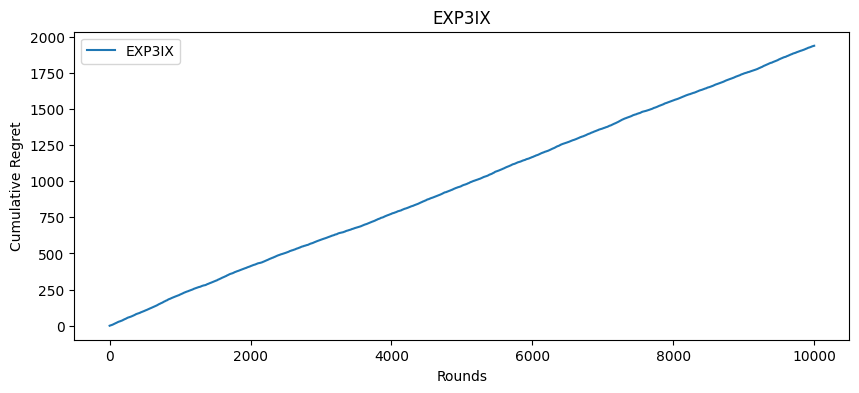

In [59]:
d = 10 #no of arms
w = np.ones(d) #intialize weights of 10 arms
T = 10000 #no of time steps
alpha = 5
beta_1 = 5
beta_2 = 10
loss = generate_loss(alpha,beta_1,beta_2,T,d)
eta = math.sqrt((2*math.log(d+1))/T*d)
# eta = 0.07
print(eta)
gamma = eta/2
exp3 = EXP3IX(d,w,loss,eta,gamma) 
regret = exp3.run(T)


plt.figure(figsize=(10, 4))
plt.plot(regret, label='EXP3IX')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.title('EXP3IX')
plt.legend()
plt.show()

### Approach-EXP3IX:
- Considered number of arms **(d = 10)**.
- Generated a d dimensional loss vector where each component is chosen iid from a Beta distribution.
- for 1 to 9 arms **α = 5, β = 5**
- for 10th arm **α = 5, β = 10**
- considering initial weights w = 1 for all the arms.
- **eta = math.sqrt((2*math.log(d+1))/T*d).**
- **gamma = eta/2.**
- 
- In **EXP3IX** implicit exploration algorithm:
- for each round t in T:
- probabilty **(p)** = w/sum(w)
- choose an arm based on random weighted choice and get the loss Li
- from **EXP3** change how we update Li_hat = [0,0,...,**Li/(p_i+gamma)**,..0,0]
- **[Hedge Update]:** update the weights w = w * e^-eta*Li_hat


## Implement both the algorithms and run it for 1000 times for 10, 000 iterations each and plot the (pseudo) regrets along with error bars.

In [ ]:
d = 10 #no of arms
T = 10000 #no of time steps
alpha = 5
beta_1 = 5
beta_2 = 10
loss = generate_loss(alpha,beta_1,beta_2,T,d)
num_runs = 1000  # number of times to run the algorithm

all_regrets_EXP3 = np.zeros((num_runs, T))
all_regrets_EXP3IX = np.zeros((num_runs, T))

for run in range(num_runs):
    w = np.ones(d)
    # print(run)
    eta = math.sqrt((2*math.log(d+1))/T*d)
    gamma = eta/2
    exp3 = EXP3(d,w,loss,eta,gamma)
    exp3IX = EXP3IX(d,w,loss,eta,gamma)
    regret_exp3 = exp3.run(T)
    regret_exp3IX = exp3IX.run(T)
    all_regrets_EXP3[run] = regret_exp3 
    all_regrets_EXP3IX[run] = regret_exp3IX
    


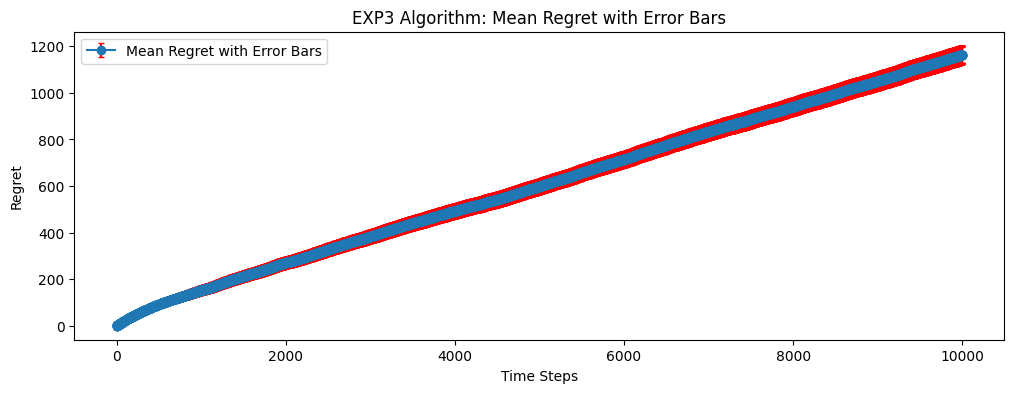

In [25]:

mean_regret = np.mean(all_regrets_EXP3, axis=0)
std_regret = np.std(all_regrets_EXP3, axis=0)

plt.figure(figsize=(12, 4))
plt.errorbar(range(T), mean_regret, yerr=std_regret, fmt='-o', ecolor='r', capsize=2, capthick=1, label='Mean Regret with Error Bars')
plt.xlabel('Time Steps')
plt.ylabel('Regret')
plt.title('EXP3 Algorithm: Mean Regret with Error Bars')
plt.legend()
plt.show()

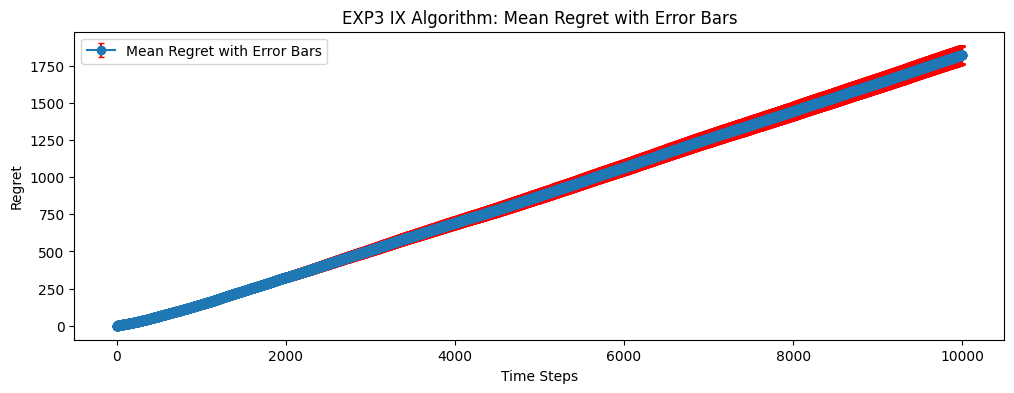

In [26]:

mean_regret = np.mean(all_regrets_EXP3IX, axis=0)
std_regret = np.std(all_regrets_EXP3IX, axis=0)

plt.figure(figsize=(12, 4))
plt.errorbar(range(T), mean_regret, yerr=std_regret, fmt='-o', ecolor='r', capsize=2, capthick=1, label='Mean Regret with Error Bars')
plt.xlabel('Time Steps')
plt.ylabel('Regret')
plt.title('EXP3 IX Algorithm: Mean Regret with Error Bars')
plt.legend()
plt.show()

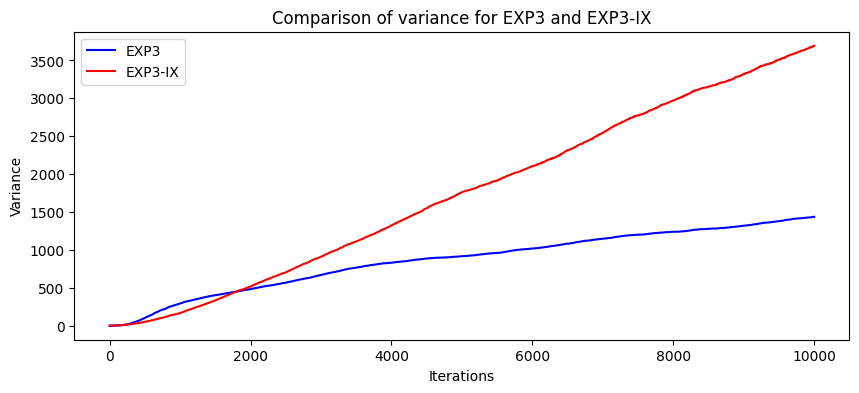

In [66]:
std_regret_EXP3 = np.std(all_regrets_EXP3, axis=0)
std_regret_EXP3IX = np.std(all_regrets_EXP3IX, axis=0)
variance_EXP3 = std_regret_EXP3**2
variance_EXP3IX = std_regret_EXP3IX**2

plt.figure(figsize=(10, 4))
plt.plot(range(T), variance_EXP3, label='EXP3', color='blue')
plt.plot(range(T), variance_EXP3IX, label='EXP3-IX', color='red')
plt.xlabel('Iterations')
plt.ylabel('Variance')
plt.title('Comparison of variance for EXP3 and EXP3-IX')
plt.legend()
plt.show()

## Observations:


- We can observe in the Variance comparision(line chart) above **variance of EXP3-IX algorithm is higher than that for the EXP3 algorithm**, it indicates that the performance of EXP3-IX is inconsistent, which could lead to more unpredictable outcomes across different runs.
- This instability can be a disadvantage especially in applications where we expect consistent performance.
- The higher variance in EXP3-IX might also indicate that the **regret for EXP3-IX fluctuates more widely** and the algorithm is exploring more aggressively.This can increase the **risk of suboptimal choices**(choosing few arms/choices which have better rewards for short period of time), especially in adversarial settings.